Implementation of Load Forecasting(Day) using **Exponential Smoothing** Methods on **Day Data**

In [40]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import io

In [41]:
from google.colab import files
uploaded = files.upload()

Saving D_load.csv to D_load (1).csv


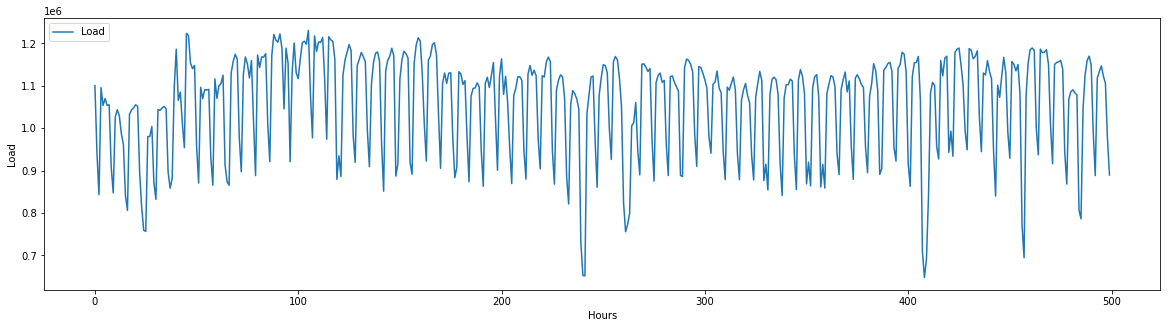

In [42]:
df = pd.read_csv(io.BytesIO(uploaded['D_load.csv']))
plt.figure(figsize=(20,5))
plt.plot(df[:500], label='Load')
plt.legend(loc='upper left')
plt.xlabel("Hours")
plt.ylabel("Load")
plt.show()

In [43]:
def exp_smth (l,a,n=-1):
    if n<=0:
      return l[0]
    
    if (a==1):
      return l[n-1]

    
   # Y=aXt+(1-a)Yt-1, 0<a<1
    return a*l[n-1]+(1-a)*exp_smth(l,a,n-1)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [44]:
l=list(df['Load']) #converting into a list


l_exp_smth=[]
for n in range(len(l)):
  l_exp_smth.append(exp_smth(l,1,n))  #assigning previous value



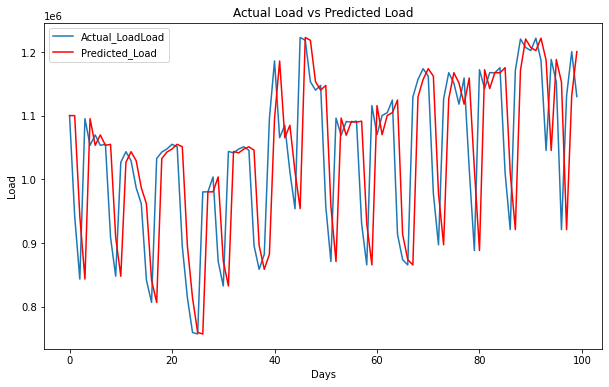

In [45]:
plt.figure(figsize=(10,6))
plt.plot(l[0:100], label='Actual_LoadLoad')
plt.plot(l_exp_smth[0:100], label='Predicted_Load', color='Red')
plt.legend(loc='upper left')
plt.xlabel("Days")
plt.ylabel("Load")
plt.title("Actual Load vs Predicted Load")
plt.show()

In [46]:

mape=mean_absolute_percentage_error(l, l_exp_smth)
print("Mean Absolute Error Percentage in Moving Average Method is ", round(mape,2),"%")



Mean Absolute Error Percentage in Moving Average Method is  8.21 %
